Henry Ho 304723723

# League Rank Predictor

Uses Riot Developer's api V3 (https://developer.riotgames.com/) and seeded data to predict the "highest achieved season tier" for each player using the data from matches as features.

Features include:
-Role
-Kills
-Deaths
-Assists
-GoldEarned
-DamageDealtToObjectives
-TotalMinionsKilled

Labels include:
- UNRANKED
- BRONZE
- SILVER
- GOLD
- PLATINUM
- DIAMOND
- MASTERS
- CHALLENGER

In [3]:
# Import pandas
import pandas as pd

## Create Dataframe using Riot's seeded data

In [4]:
# Creating empty dataframe
stats_df = pd.DataFrame()

### Parse seeded data

In [5]:
# Importing JSON
import json

# Function gets stats from seeded data and returns a dataframe
def get_stats(*files):
    df = pd.DataFrame()
    
    if len(files) == 1:
        df = parse_json(files)
    elif len(files) > 1:
        for file in files:
            df = df.append(parse_json(file), ignore_index=True)
            
    return df
        
# Function that parses json file into a dataframe
def parse_json(file):
    df = pd.DataFrame(columns = ['win', 'role', 'kills', 'deaths', 'assists', 'gameDuration', 'goldEarned', 'totalMinionsKilled', 'damageDealtToObjectives', 'totalDamageDealt', 'totalDamageTaken', 'wardsPlaced', 'highestAchievedSeasonTier'])
    matches = pd.read_json(path_or_buf=file)
    
    for match in matches['matches']:
        for participant in match['participants']:
            
            df = df.append({'win': participant['stats']['win'],
                            'role': participant['timeline']['role'],
                            'kills': participant['stats']['kills'],
                            'deaths': participant['stats']['deaths'],
                            'assists': participant['stats']['assists'],
                            'gameDuration': match['gameDuration'],
                            'goldEarned': participant['stats']['goldEarned'],
                            'totalMinionsKilled': participant['stats']['totalMinionsKilled'],
                            'damageDealtToObjectives': participant['stats']['damageDealtToObjectives'],
                            'totalDamageDealt': participant['stats']['totalDamageDealt'],
                            'totalDamageTaken': participant['stats']['totalDamageTaken'],
                            'wardsPlaced': participant['stats']['wardsPlaced'],
                            'highestAchievedSeasonTier': participant['highestAchievedSeasonTier']}, ignore_index=True)

    return df

In [6]:
# datasets = ['datasets/matches1.json', 'datasets/matches2.json', 'datasets/matches3.json', 
#             'datasets/matches4.json', 'datasets/matches5.json', 'datasets/matches6.json', 
#             'datasets/matches7.json', 'datasets/matches8.json', 'datasets/matches9.json', 
#             'datasets/matches10.json']

datasets = ['datasets/matches1.json', 'datasets/matches2.json', 'datasets/matches3.json',
            'datasets/matches4.json', 'datasets/matches5.json', 'datasets/matches6.json',
            'datasets/matches7.json', 'datasets/matches8.json', 'datasets/matches9.json',
            'datasets/matches10.json'
           ]
stats_df = get_stats(*datasets)
print(stats_df)

        win         role kills deaths assists gameDuration goldEarned  \
0      True         SOLO    17      5      25         3509      26248   
1      True    DUO_CARRY    24     14      15         3509      28906   
2      True  DUO_SUPPORT     8     17      22         3509      18845   
3      True         NONE     7      7      29         3509      19404   
4      True         SOLO    10     10      20         3509      20805   
5     False         NONE     8     15      12         3509      19921   
6     False         SOLO    14     13      12         3509      22644   
7     False  DUO_SUPPORT    11     15      16         3509      20659   
8     False    DUO_CARRY     8     12      18         3509      22493   
9     False         SOLO    12     11      13         3509      22368   
10    False         SOLO     3      8      14         3105      17936   
11    False  DUO_SUPPORT     8     10      16         3105      19876   
12    False    DUO_CARRY     9     12      14      

In [17]:
from sklearn import preprocessing
feature_matrix = ["role", "kills", "deaths", "assists","goldEarned", "totalMinionsKilled", "damageDealtToObjectives","totalDamageDealt"]
X = stats_df[feature_matrix]
Z = pd.get_dummies(X, columns=["role"])
#Z = preprocessing.scale(Z)
print(Z)


label_vector = stats_df["highestAchievedSeasonTier"]
print(label_vector)

     kills deaths assists goldEarned totalMinionsKilled  \
0       17      5      25      26248                373   
1       24     14      15      28906                403   
2        8     17      22      18845                 68   
3        7      7      29      19404                 86   
4       10     10      20      20805                287   
5        8     15      12      19921                 57   
6       14     13      12      22644                269   
7       11     15      16      20659                 95   
8        8     12      18      22493                285   
9       12     11      13      22368                226   
10       3      8      14      17936                232   
11       8     10      16      19876                175   
12       9     12      14      18803                263   
13       8     15      17      18682                142   
14      19     13      11      21040                246   
15       1      6      29      16889                 56 

#KNN CLASSIFIER


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Z, label_vector, test_size=0.3, random_state=3)

k = 89

## After 87 the accuracy will start decreasing again 

knn = KNeighborsClassifier(n_neighbors = k) 

##Train with training set
knn.fit(X_train, y_train)

## Test with testing set
y_predict = knn.predict(X_test)

## Print results
results = pd.DataFrame()

results['Actual'] = y_test
results['Prediction'] = y_predict
print(results.head())

## Calculate accuracy from prediction
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)

print('\n')
score = 'Accuracy: '
print('%s %lf' % (score, accuracy))

        Actual Prediction
5876  UNRANKED     SILVER
6555  PLATINUM     SILVER
1448      GOLD     SILVER
3351      GOLD     SILVER
231       GOLD       GOLD


Accuracy:  0.285667


In [14]:
#Cross-validation with KNN
from sklearn import datasets
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn import linear_model
import matplotlib.pyplot as plt
#import cross validation library
from sklearn.cross_validation import cross_val_score

#cross validation for knn
newKNN = KNeighborsClassifier(n_neighbors = k)

accuracy_listknn = cross_val_score(newKNN, Z, label_vector, cv=10, scoring='accuracy')

accuracy_cvknn = accuracy_listknn.mean()

score = 'KNN Mean Accuracy: '
print('%s %lf' % (score, accuracy_cvknn))


/Users/nikko/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


KNN Mean Accuracy:  0.285306


In [92]:
#Plot
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# h = .02

# labelencoder = LabelEncoder()


# for weights in ['uniform', 'distance']:

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     X.values[:, 1] = labelencoder.fit_transform(X.values[:, 1])
#     print(X.values[:,1])
#     y_test = labelencoder.transform(y_test)
#     x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
#     y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     P = knn.predict(np.c_[X_test, y_test])

#     # Put the result into a color plot
#     #P = P.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, P, cmap=cmap_light)

#     # Plot also the training points
#     plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap=cmap_bold,
#                 edgecolor='k', s=20)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("3-Class classification (k = %i, weights = '%s')"
#               % (n_neighbors, weights))

# plt.show()

In [36]:
## Logistic regression
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)


resultsLR = pd.DataFrame()

y_predict_lr = my_logreg.predict(X_test)

resultsLR['Actual'] = y_test
resultsLR['Prediction'] = y_predict_lr
print(resultsLR.head())

accuracyLR = accuracy_score(y_test, y_predict_lr)

print('\n')
score = 'Accuracy: '
print('%s %lf' % (score, accuracyLR))

cv_score = 'Cross-validation accuracy: '
print(accuracy_list)
accuracy_list = cross_val_score(my_logreg, Z, label_vector, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()
print('%s %lf' % (cv_score, accuracy_cv))

        Actual Prediction
5876  UNRANKED     SILVER
6555  PLATINUM     SILVER
1448      GOLD     SILVER
3351      GOLD     SILVER
231       GOLD     SILVER


Accuracy:  0.294000
[ 0.2994012   0.29840319  0.30139721  0.3006993   0.3         0.302       0.302
  0.3013013   0.30160321  0.30120482]


/Users/nikko/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


Cross-validation accuracy:  0.300801


In [30]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators = 1000, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train, y_train)

y_predictRF = my_RandomForest.predict(X_test)

resultsRF = pd.DataFrame()

resultsRF['Actual'] = y_test
resultsRF['Prediction'] = y_predictRF
print(resultsRF)

accuracyRF = accuracy_score(y_test, y_predictRF)

print('\n')
score = 'Accuracy: '
print('%s %lf' % (score, accuracyRF))


        Actual Prediction
5876  UNRANKED     SILVER
6555  PLATINUM       GOLD
1448      GOLD   UNRANKED
3351      GOLD     SILVER
231       GOLD     SILVER
1204  PLATINUM     SILVER
1911    BRONZE   UNRANKED
9648  PLATINUM   UNRANKED
8438    BRONZE     SILVER
7541    SILVER     SILVER
2589    SILVER     SILVER
977     SILVER     SILVER
4684    SILVER     SILVER
3814    BRONZE     SILVER
4023    SILVER     SILVER
4189  UNRANKED     SILVER
9246      GOLD       GOLD
9004    SILVER     BRONZE
4646      GOLD   UNRANKED
8730  PLATINUM       GOLD
7910      GOLD     SILVER
3740  UNRANKED     SILVER
2675      GOLD     SILVER
7111    BRONZE   UNRANKED
2423      GOLD     SILVER
5642    BRONZE     SILVER
850     SILVER       GOLD
898       GOLD       GOLD
6336    SILVER   PLATINUM
2471      GOLD     SILVER
...        ...        ...
5313    BRONZE     SILVER
4088    BRONZE       GOLD
4204  UNRANKED     SILVER
6358  PLATINUM     SILVER
447     SILVER       GOLD
2952    MASTER     SILVER
9926    SILV

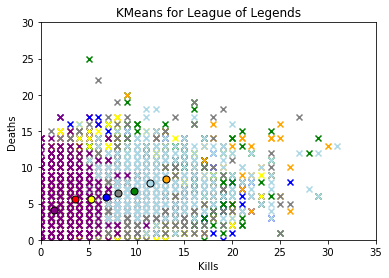

In [69]:
#K-Means

from sklearn.cluster import KMeans

my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(Z)
labels = my_KMeans.labels_
centers = my_KMeans.cluster_centers_

best_features = ['kills', 'deaths']
graph = Z[best_features]

# Clustering:
my_KMeans = KMeans(n_clusters=8)
my_KMeans.fit(Z)

labels = my_KMeans.labels_
centers = my_KMeans.cluster_centers_
plt.figure

for l, c in zip([0,1,2,3,4,5,6,7], ['red', 'blue', 'green', 'orange','yellow','gray', 'lightblue','purple']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(Z.iloc[current_members,0], Z.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([0, 35])
plt.ylim([0, 30])

# Labels, Title, Legend:
plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('KMeans for League of Legends')

plt.show()





In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
linreg = LinearRegression()

le.fit(["UNRANKED", "BRONZE", "SILVER", "GOLD", "PLATINUM", "DIAMOND", "MASTER", "CHALLENGER"])
Y = le.transform(label_vector)

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.3, random_state=2)

linreg.fit(X_train, y_train)


print(linreg.intercept_)
print(linreg.coef_)

y_prediction_linR = linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_prediction_linR)
rmse = np.sqrt(mse)
print('%s %lf' % ('RSME: ', rmse))


4.57327047168
[  6.73178074e-03   3.88329155e-03   2.90324326e-03  -2.10930451e-05
  -1.32121699e-04  -9.06941893e-06   1.36845756e-06   1.49775558e-01
  -1.07771006e-01   4.14770246e-02  -7.60113955e-02  -7.47018123e-03]
RSME:  2.359339


Most important feature: Kills
Least important feature: Damage dealt to objectives

In [49]:
#Cross-validation for Linear Regression

crosslinreg = LinearRegression()
mse_list = cross_val_score(crosslinreg, Z, Y, cv =10, scoring='neg_mean_squared_error')

## converting to positive and and squaring
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
#print(mse_list)
#print(rmse_list)
print('%s %lf' % ('RSME MEAN: ', rmse_list.mean()))

RSME MEAN:  2.337418


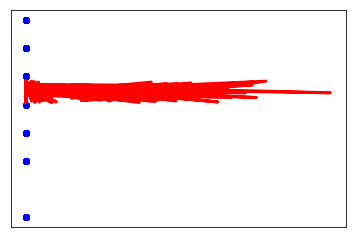

In [59]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

#can not accurately plot because we have to many features

plt.scatter(X_test.values[:,0], y_test,  color='blue')

plt.plot(X_test, y_prediction_linR, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()